In [1]:
!pip install -U accelerate
!pip install -U transformers

     -------------------------------------- 280.0/280.0 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.5/8.5 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.2
    Uninstalling transformers-4.37.2:
      Successfully uninstalled transformers-4.37.2



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot

In [4]:
data=pd.read_json("C:\\Users\\Mukund Agarwalla\\OneDrive\\Desktop\\IIT BHU\\primate_dataset.json")
data.head(5)

,post_title,post_text,annotations
0,I don't feel original anymore.,"When I was in high school a few years back, I ...",[[Feeling-bad-about-yourself-or-that-you-are-a...
1,I don’t have anyone to talk to and I don’t kno...,Nine years ago I was diagnosed with depression...,[[Feeling-bad-about-yourself-or-that-you-are-a...
2,Stuck between moving forward and killing myself,Some background information: My GF of almost 3...,[[Feeling-bad-about-yourself-or-that-you-are-a...
3,I need help on how to help my girlfriend.,"My girlfriend ,of about 3 months now ,has been...",[[Feeling-bad-about-yourself-or-that-you-are-a...
4,I've been feeling this way for some tine,I'm alway feeling like this. It doesn't even m...,[[Feeling-bad-about-yourself-or-that-you-are-a...


In [5]:
import pandas as pd

# Assuming 'data' is your DataFrame
data = data.head(2000)

# Now 'data_subset' contains only the first 2000 rows


In [6]:
# Assuming you have a DataFrame named 'data' with columns 'annotations' and 'new'
# Initialize 'new' column with empty lists
data['new'] = [[] for _ in range(len(data))]

for row in range(len(data)):
    lst = []  # Create a new list for each iteration of the outer loop
    for col in range(len(data.annotations[0])):
        if data['annotations'][row][col][1] == 'yes':
            lst.append(data['annotations'][row][col][0])
    data['new'].iloc[row] = lst  # Assign the list to the 'new' column for the current row

# Now 'data['new']' should contain lists for each row based on your condition

C:\Users\Mukund Agarwalla\AppData\Local\Temp\ipykernel_336\493744018.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['new'].iloc[row] = lst  # Assign the list to the 'new' column for the current row
C:\Users\Mukund Agarwalla\AppDat

In [7]:
data.head(2)

,post_title,post_text,annotations,new
0,I don't feel original anymore.,"When I was in high school a few years back, I ...",[[Feeling-bad-about-yourself-or-that-you-are-a...,[Feeling-bad-about-yourself-or-that-you-are-a-...
1,I don’t have anyone to talk to and I don’t kno...,Nine years ago I was diagnosed with depression...,[[Feeling-bad-about-yourself-or-that-you-are-a...,[Feeling-bad-about-yourself-or-that-you-are-a-...


In [8]:
for i in range(len(data)):
    for j in range(len(data.annotations[i])):
        # Get the value from the annotations list
        value = data.annotations[i][j][1]
        # Assign the value to the DataFrame at the specified row and column
        data.loc[i,j]=value

In [9]:
data.head(1)

,post_title,post_text,annotations,new,0,1,2,3,4,5,6,7,8
0,I don't feel original anymore.,"When I was in high school a few years back, I ...",[[Feeling-bad-about-yourself-or-that-you-are-a...,[Feeling-bad-about-yourself-or-that-you-are-a-...,yes,no,yes,yes,no,no,no,no,no


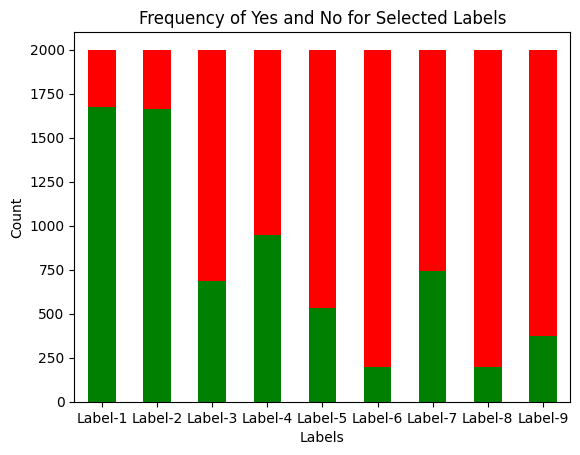

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'data' and columns are '0' to '8'
# Replace 'data' and column names with your actual DataFrame and column names if they're different

# Specify the columns you want to include in the plot
selected_columns = [0,1,2,3,4,5,6,7,8]

# Create a DataFrame to store counts of 'yes' and 'no' for each selected column
column_counts = {'Column': [], 'Yes': [], 'No': []}

# Iterate through each selected column
for column in selected_columns:
    # Count 'yes' and 'no' values in the column
    yes_count = (data[column] == 'yes').sum()
    no_count = (data[column] == 'no').sum()

    # Append counts to the DataFrame
    column_counts['Column'].append(column)
    column_counts['Yes'].append(yes_count)
    column_counts['No'].append(no_count)

# Convert the counts to a DataFrame
column_counts_df = pd.DataFrame(column_counts)

# Plot the bar plot without legend
ax = column_counts_df.set_index('Column').plot(kind='bar', stacked=True, color=['green', 'red'], legend=None)
plt.title('Frequency of Yes and No for Selected Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

# Customize x-axis labels
ax.set_xticklabels([f'Label-{label+1}' for label in selected_columns], rotation=0)

# Add a custom legend
# ax.text(0.5, 0.95, 'Yes', color='green', fontsize=10, ha='center', va='center', transform=ax.transAxes)
# ax.text(0.5, 0.9, 'No', color='red', fontsize=10, ha='center', va='center', transform=ax.transAxes)

plt.show()


In [11]:
import pandas as pd

# Assuming your DataFrame is named 'data'
# Replace 'data' with your actual DataFrame name if it's different

# Specify the columns you want to delete
columns_to_delete = [0,1,2,3,4,5,6,7,8]

# Drop the specified columns
data.drop(columns=columns_to_delete, inplace=True)

# Now, 'data' will no longer contain columns '0' to '8'


In [12]:
data.drop(['annotations'],inplace=True,axis=1)
data['context']=data['post_text']
data.drop(['post_title','post_text'],inplace=True,axis=1)
# Iterate over each list in data['new'] and remove hyphens from each string in the list
for i in range(len(data['new'])):
    for j in range(len(data['new'][i])):
        data['new'][i][j] = data['new'][i][j].replace('-', ' ')

data.new

0       [Feeling bad about yourself or that you are a ...
1       [Feeling bad about yourself or that you are a ...
2       [Feeling bad about yourself or that you are a ...
3       [Feeling bad about yourself or that you are a ...
4       [Feeling bad about yourself or that you are a ...
                              ...                        
1995    [Feeling bad about yourself or that you are a ...
1996    [Feeling bad about yourself or that you are a ...
1997    [Feeling bad about yourself or that you are a ...
1998    [Feeling bad about yourself or that you are a ...
1999    [Feeling bad about yourself or that you are a ...
Name: new, Length: 2000, dtype: object

In [13]:

!pip install contractions
!pip install textblob
!pip install spacy
!pip install nltk

     -------------------------------------- 289.9/289.9 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 626.3/626.3 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
data['word_count'] = data['context'].apply(lambda x: len(str(x).split()))


In [15]:
data['word_count'].max()

2474

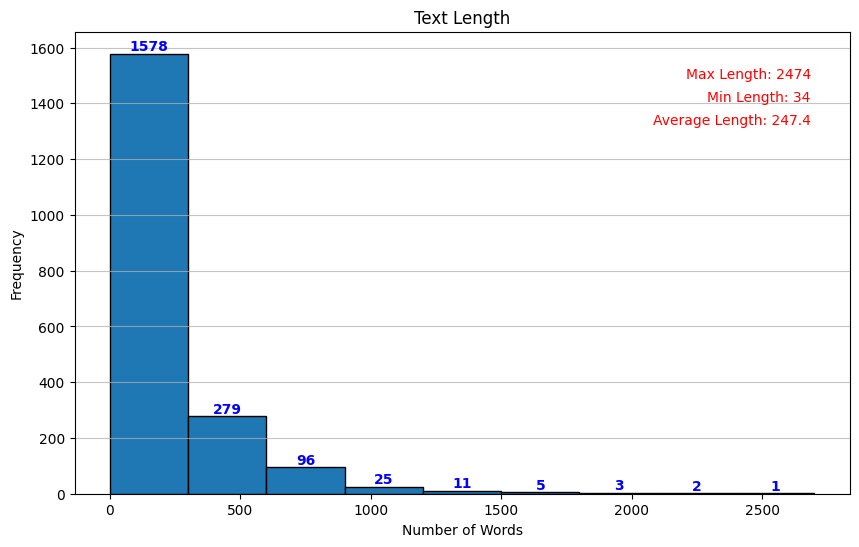

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'data' and the column is 'context'
# Replace 'data' and 'context' with your actual DataFrame and column name if they're different

# Add a 'word_count' column

# Plot the histogram
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(data['word_count'], bins=range(0, max(data['word_count']) + 300, 300), edgecolor='black')
plt.title('Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display frequency counts on top of each bar
for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + 150, count, str(int(count)), ha='center', va='bottom', fontweight='bold', color='blue')

# Calculate and annotate max, min, and average lengths in the top right corner
max_length = max(data['word_count'])
min_length = min(data['word_count'])
avg_length = round(data['word_count'].mean(), 2)

plt.text(0.95, 0.9, f'Max Length: {max_length}', transform=plt.gca().transAxes, color='red', fontsize=10, ha='right')
plt.text(0.95, 0.85, f'Min Length: {min_length}', transform=plt.gca().transAxes, color='red', fontsize=10, ha='right')
plt.text(0.95, 0.8, f'Average Length: {avg_length}', transform=plt.gca().transAxes, color='red', fontsize=10, ha='right')

plt.show()


In [17]:
data.head(2)

,new,context,word_count
0,[Feeling bad about yourself or that you are a ...,"When I was in high school a few years back, I ...",319
1,[Feeling bad about yourself or that you are a ...,Nine years ago I was diagnosed with depression...,349


In [18]:
data.drop(['word_count'],axis=1,inplace=True)

In [19]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import contractions

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

nltk.download('punkt')

# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

# Define a function to perform lemmatization
def lemmatize(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

# Define a function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Define a function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Define a function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Define a function to apply all preprocessing steps
def preprocess(text):
      text = expand_contractions(text)
      text = remove_stopwords(text)
      text = remove_punctuation(text)
      text = lemmatize(text)
      return text

# Apply the function to your text data
data.context=data.context.apply(preprocess)



[nltk_data] Downloading package punkt to C:\Users\Mukund
[nltk_data]     Agarwalla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mukund
[nltk_data]     Agarwalla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Define a function to count the number of words in a string
def count_words(string):
    return len(string.split())

# Filter the DataFrame to keep rows where the 'context' column has less than or equal to 600 words
data = data[data['context'].apply(count_words) <= 600]

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

# Print the filtered DataFrame
data


,new,context
0,[Feeling bad about yourself or that you are a ...,high school year back one high competitor sc...
1,[Feeling bad about yourself or that you are a ...,nine year ago diagnose depression generalise a...
2,[Feeling bad about yourself or that you are a ...,background information GF almost 3 year brea...
3,[Feeling bad about yourself or that you are a ...,girlfriend 3 month good friend 8 month alw...
4,[Feeling bad about yourself or that you are a ...,alway feeling like even matter age anymore ...
...,...,...
1982,[Feeling bad about yourself or that you are a ...,diagnose early year depression due alot stuff ...
1983,[Feeling bad about yourself or that you are a ...,straight college student part time EMT unemp...
1984,[Feeling bad about yourself or that you are a ...,week ago argument someone close kind escalate ...
1985,[Feeling bad about yourself or that you are a ...,addict ashamed miserable deeply sad life...


In [21]:
!pip install scikit-multilearn

     ---------------------------------------- 89.4/89.4 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()


def balanced_split(data, mlb, test_size=0.5):
    ind = np.expand_dims(np.arange(len(data)), axis=1)
    mlb.fit_transform(data["new"])
    labels = mlb.transform(data["new"])
    ind_train, _, ind_test, _ = iterative_train_test_split(
        ind, labels, test_size
    )
    return data.iloc[ind_train[:, 0]], data.iloc[ind_test[:, 0]]



data_train, data_test = balanced_split(data, mlb, test_size=0.2)

# here data_train is the training dataframe
# data_val is the validation dataframe
# data_test is the testing dataframe

In [23]:
data_train.iloc[1].new

['Feeling bad about yourself or that you are a failure or have let yourself or your family down',
 'Feeling down depressed or hopeless',
 'Thoughts that you would be better off dead or of hurting yourself in some way']

In [24]:
data_train_y = mlb.fit_transform(data_train['new'])
data_train_y = data_train_y.astype(float)
data_test_y = mlb.fit_transform(data_test['new'])
data_test_y = data_test_y.astype(float)

In [25]:
data_train_y

array([[1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [26]:
data_train_X = data_train['context'].tolist()
data_test_X = data_test['context'].tolist()

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


class ResampleLoss(nn.Module):
    def __init__(
        self,
        use_sigmoid=True,
        partial=False,
        loss_weight=1.0,
        reduction="mean",
        reweight_func=None,
        weight_norm=None,
        focal=dict(focal=True, alpha=0.5, gamma=2),
        map_param=dict(alpha=10.0, beta=0.2, gamma=0.1),
        CB_loss=dict(CB_beta=0.9, CB_mode="average_w"),
        logit_reg=dict(neg_scale=5.0, init_bias=0.1),
        class_freq=None,
        train_num=None,
    ):
        super(ResampleLoss, self).__init__()
        assert (use_sigmoid is True) or (partial is False)
        self.use_sigmoid = use_sigmoid
        self.partial = partial
        self.loss_weight = loss_weight
        self.reduction = reduction
        if self.use_sigmoid:
            if self.partial:
                self.cls_criterion = partial_cross_entropy
            else:
                self.cls_criterion = binary_cross_entropy
        else:
            self.cls_criterion = cross_entropy
        # reweighting function
        self.reweight_func = reweight_func
        # normalization (optional)
        self.weight_norm = weight_norm
        # focal loss params
        self.focal = focal["focal"]
        self.gamma = focal["gamma"]
        self.alpha = focal["alpha"]
        # mapping function params
        self.map_alpha = map_param["alpha"]
        self.map_beta = map_param["beta"]
        self.map_gamma = map_param["gamma"]
        # CB loss params (optional)
        self.CB_beta = CB_loss["CB_beta"]
        self.CB_mode = CB_loss["CB_mode"]
        self.class_freq = (
            torch.from_numpy(np.asarray(class_freq)).float().cuda()
        )
        self.num_classes = self.class_freq.shape[0]
        self.train_num = train_num  # only used to be divided by class_freq
        # regularization params
        self.logit_reg = logit_reg
        self.neg_scale = (
            logit_reg["neg_scale"] if "neg_scale" in logit_reg else 1.0
        )
        init_bias = (
            logit_reg["init_bias"] if "init_bias" in logit_reg else 0.0
        )
        self.init_bias = (
            -torch.log(self.train_num / self.class_freq - 1) * init_bias
        )
        self.freq_inv = (
            torch.ones(self.class_freq.shape).cuda() / self.class_freq
        )
        self.propotion_inv = self.train_num / self.class_freq

    def forward(
        self,
        cls_score,
        label,
        weight=None,
        avg_factor=None,
        reduction_override=None,
        **kwargs
    ):
        assert reduction_override in (None, "none", "mean", "sum")
        reduction = (
            reduction_override if reduction_override else self.reduction
        )
        weight = self.reweight_functions(label)
        cls_score, weight = self.logit_reg_functions(
            label.float(), cls_score, weight
        )
        if self.focal:
            logpt = self.cls_criterion(
                cls_score.clone(),
                label,
                weight=None,
                reduction="none",
                avg_factor=avg_factor,
            )
            # pt is sigmoid(logit) for pos or sigmoid(-logit) for neg
            pt = torch.exp(-logpt)
            wtloss = self.cls_criterion(
                cls_score, label.float(), weight=weight, reduction="none"
            )
            alpha_t = torch.where(label == 1, self.alpha, 1 - self.alpha)
            loss = alpha_t * ((1 - pt) ** self.gamma) * wtloss
            loss = reduce_loss(loss, reduction)
        else:
            loss = self.cls_criterion(
                cls_score, label.float(), weight, reduction=reduction
            )
        loss = self.loss_weight * loss
        return loss

    def reweight_functions(self, label):
        if self.reweight_func is None:
            return None
        elif self.reweight_func in ["inv", "sqrt_inv"]:
            weight = self.RW_weight(label.float())
        elif self.reweight_func in "rebalance":
            weight = self.rebalance_weight(label.float())
        elif self.reweight_func in "CB":
            weight = self.CB_weight(label.float())
        else:
            return None
        if self.weight_norm is not None:
            if "by_instance" in self.weight_norm:
                max_by_instance, _ = torch.max(weight, dim=-1, keepdim=True)
                weight = weight / max_by_instance
            elif "by_batch" in self.weight_norm:
                weight = weight / torch.max(weight)
        return weight

    def logit_reg_functions(self, labels, logits, weight=None):
        if not self.logit_reg:
            return logits, weight
        if "init_bias" in self.logit_reg:
            logits += self.init_bias
        if "neg_scale" in self.logit_reg:
            logits = logits * (1 - labels) * self.neg_scale + logits * labels
            if weight is not None:
                weight = (
                    weight / self.neg_scale * (1 - labels) + weight * labels
                )
        return logits, weight

    def rebalance_weight(self, gt_labels):
        repeat_rate = torch.sum(
            gt_labels.float() * self.freq_inv, dim=1, keepdim=True
        )
        pos_weight = (
            self.freq_inv.clone().detach().unsqueeze(0) / repeat_rate
        )
        # pos and neg are equally treated
        weight = (
            torch.sigmoid(self.map_beta * (pos_weight - self.map_gamma))
            + self.map_alpha
        )
        return weight

    def CB_weight(self, gt_labels):
        if "by_class" in self.CB_mode:
            weight = (
                torch.tensor((1 - self.CB_beta)).cuda()
                / (1 - torch.pow(self.CB_beta, self.class_freq)).cuda()
            )
        elif "average_n" in self.CB_mode:
            avg_n = torch.sum(
                gt_labels * self.class_freq, dim=1, keepdim=True
            ) / torch.sum(gt_labels, dim=1, keepdim=True)
            weight = (
                torch.tensor((1 - self.CB_beta)).cuda()
                / (1 - torch.pow(self.CB_beta, avg_n)).cuda()
            )
        elif "average_w" in self.CB_mode:
            weight_ = (
                torch.tensor((1 - self.CB_beta)).cuda()
                / (1 - torch.pow(self.CB_beta, self.class_freq)).cuda()
            )
            weight = torch.sum(
                gt_labels * weight_, dim=1, keepdim=True
            ) / torch.sum(gt_labels, dim=1, keepdim=True)
        elif "min_n" in self.CB_mode:
            min_n, _ = torch.min(
                gt_labels * self.class_freq + (1 - gt_labels) * 100000,
                dim=1,
                keepdim=True,
            )
            weight = (
                torch.tensor((1 - self.CB_beta)).cuda()
                / (1 - torch.pow(self.CB_beta, min_n)).cuda()
            )
        else:
            raise NameError
        return weight

    def RW_weight(self, gt_labels, by_class=True):
        if "sqrt" in self.reweight_func:
            weight = torch.sqrt(self.propotion_inv)
        else:
            weight = self.propotion_inv
        if not by_class:
            sum_ = torch.sum(weight * gt_labels, dim=1, keepdim=True)
            weight = sum_ / torch.sum(gt_labels, dim=1, keepdim=True)
        return weight


def reduce_loss(loss, reduction):
    """Reduce loss as specified.
    Args:
        loss (Tensor): Elementwise loss tensor.
        reduction (str): Options are "none", "mean" and "sum".
    Return:
        Tensor: Reduced loss tensor.
    """
    reduction_enum = F._Reduction.get_enum(reduction)
    # none: 0, elementwise_mean:1, sum: 2
    if reduction_enum == 0:
        return loss
    elif reduction_enum == 1:
        return loss.mean()
    elif reduction_enum == 2:
        return loss.sum()


def weight_reduce_loss(loss, weight=None, reduction="mean", avg_factor=None):
    """Apply element-wise weight and reduce loss.
    Args:
        loss (Tensor): Element-wise loss.
        weight (Tensor): Element-wise weights.
        reduction (str): Same as built-in losses of PyTorch.
        avg_factor (float): Avarage factor when computing the mean of losses.
    Returns:
        Tensor: Processed loss values.
    """
    # if weight is specified, apply element-wise weight
    if weight is not None:
        loss = loss * weight
    # if avg_factor is not specified, just reduce the loss
    if avg_factor is None:
        loss = reduce_loss(loss, reduction)
    else:
        # if reduction is mean, then average the loss by avg_factor
        if reduction == "mean":
            loss = loss.sum() / avg_factor
        # if reduction is 'none', then do nothing, otherwise raise an error
        elif reduction != "none":
            raise ValueError(
                'avg_factor can not be used with reduction="sum"'
            )
    return loss


def binary_cross_entropy(
    pred, label, weight=None, reduction="mean", avg_factor=None
):
    # weighted element-wise losses
    if weight is not None:
        weight = weight.float()
    loss = F.binary_cross_entropy_with_logits(
        pred, label.float(), weight, reduction="none"
    )
    loss = weight_reduce_loss(
        loss, reduction=reduction, avg_factor=avg_factor
    )

    return loss

In [31]:
class_freq=[]
# Count the number of ones and zeros in each column
num_ones = np.sum(data_train_y, axis=0)

# Print the results
for i in range(data_train_y.shape[1]):
    class_freq.append(num_ones[i])
# calculating size of train dataset
train_num = len(data_train)

In [32]:
loss_func = ResampleLoss(
    reweight_func="rebalance",
    loss_weight=1.0,
    focal=dict(focal=True, alpha=0.5, gamma=2),
    logit_reg=dict(init_bias=0.05, neg_scale=2.0),
    map_param=dict(alpha=0.1, beta=10.0, gamma=0.405),
    class_freq=class_freq,
    train_num=train_num
)
"""
class_freq - list of frequencies for each class,
train_num - size of train dataset
"""

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
import torch
from transformers import DistilBertTokenizer, AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification
from torch.utils.data import Dataset


checkpoint = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=len(mlb.classes_),
                                                            problem_type="multi_label_classification")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Lets build custom dataset
class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=512):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length", max_length=self.max_len, return_tensors='pt')

    return {
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'labels': label
    }

In [ ]:
train_dataset = CustomDataset(data_train_X, data_train_y, tokenizer)
test_dataset = CustomDataset(data_test_X, data_test_y, tokenizer)

In [ ]:
from torch.optim import AdamW
from torch.utils.data import DataLoader

optimizer = AdamW(model.parameters(), lr=1e-5)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
import torch

# Check if CUDA is available, and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the specified device
model = model.to(device)

# Rest of your code
num_epochs = 15
eval_interval = 1

def train(epoch):
    model.train()
    total_loss = 0.0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)  # Move to the device
        attention_mask = batch['attention_mask'].to(device)  # Move to the device
        labels = batch['labels'].to(device)  # Move to the device
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        cls_score = outputs.logits  # Assuming model output is logits
        loss = loss_func(cls_score, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch + 1) % eval_interval == 0:
        print(f'Epoch {epoch + 1}, Training Loss: {total_loss / len(train_loader)}')

for epoch in range(num_epochs):
    train(epoch)


Epoch 1, Training Loss: 0.02517412878572941
Epoch 2, Training Loss: 0.023777451552450656
Epoch 3, Training Loss: 0.023024693727493287
Epoch 4, Training Loss: 0.0212634464353323
Epoch 5, Training Loss: 0.019324024841189384
Epoch 6, Training Loss: 0.01813760306686163
Epoch 7, Training Loss: 0.016898515783250332
Epoch 8, Training Loss: 0.015871018171310425
Epoch 9, Training Loss: 0.014608445595949888
Epoch 10, Training Loss: 0.013588870894163847
Epoch 11, Training Loss: 0.012476702500134707
Epoch 12, Training Loss: 0.011297117806971074
Epoch 13, Training Loss: 0.010540177449584007
Epoch 14, Training Loss: 0.009792714305222034
Epoch 15, Training Loss: 0.00893691179342568


In [ ]:
model.eval()  # Set the model to evaluation mode
total_loss = 0.0
num_batches = 0

with torch.no_grad():  # Turn off gradient computation for testing
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)  # Move to the device
        attention_mask = batch['attention_mask'].to(device)  # Move to the device
        labels = batch['labels'].to(device)  # Move to the device
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        cls_score = outputs.logits  # Assuming model output is logits
        loss = loss_func(cls_score, labels)
        total_loss += loss.item()
        num_batches += 1

average_loss = total_loss / num_batches
print(f'Average Test Loss: {average_loss}')


Average Test Loss: 0.02750857675877901


Training Accuracy: 0.5495
Training Recall: 0.8657
Training Precision: 0.9428
Training F1-score: 0.9004
Training Hamming Loss: 0.0756
Training ROC-AUC: 0.9626


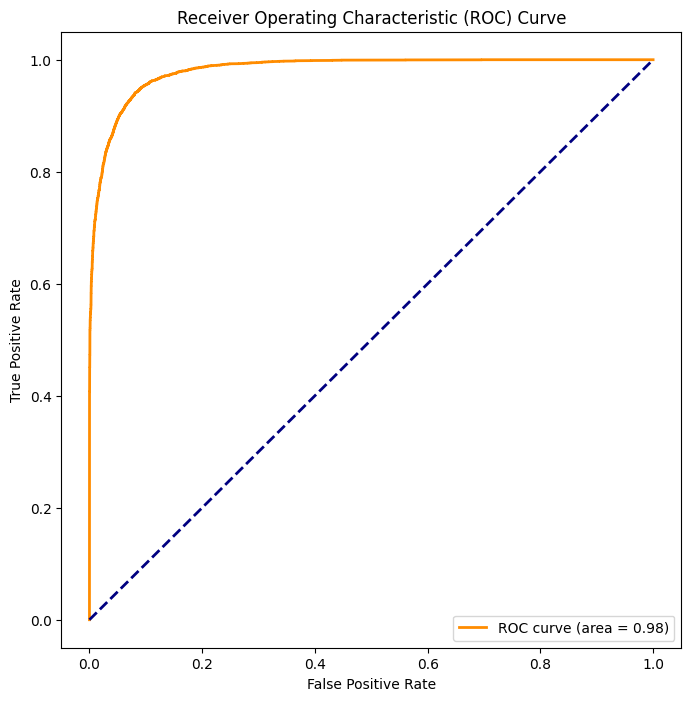

In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, hamming_loss, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the evaluation function
def evaluate(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.sigmoid(logits).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # Calculate ROC-AUC
    roc_auc = roc_auc_score(all_labels, all_preds, average='macro')

    # Generate ROC curve
    fpr, tpr, _ = roc_curve(all_labels.ravel(), all_preds.ravel())
    roc_auc_curve = auc(fpr, tpr)

    # Other metrics
    accuracy = accuracy_score(all_labels, (all_preds > 0.5).astype(int))
    recall = recall_score(all_labels, (all_preds > 0.5).astype(int), average='macro')
    precision = precision_score(all_labels, (all_preds > 0.5).astype(int), average='macro')
    f1 = f1_score(all_labels, (all_preds > 0.5).astype(int), average='macro')
    hamming = hamming_loss(all_labels, (all_preds > 0.5).astype(int))

    return accuracy, recall, precision, f1, hamming, roc_auc, fpr, tpr, roc_auc_curve

# Evaluate on training data
train_accuracy, train_recall, train_precision, train_f1, train_hamming, train_roc_auc, train_fpr, train_tpr, train_roc_auc_curve = evaluate(model, train_loader)
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Training Recall: {train_recall:.4f}')
print(f'Training Precision: {train_precision:.4f}')
print(f'Training F1-score: {train_f1:.4f}')
print(f'Training Hamming Loss: {train_hamming:.4f}')
print(f'Training ROC-AUC: {train_roc_auc:.4f}')

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(train_fpr, train_tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(train_roc_auc_curve))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score, multilabel_confusion_matrix, roc_auc_score, roc_curve, auc

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def evaluate(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = (torch.sigmoid(logits) > 0.5).long()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate accuracy for each label
    label_accuracy = {}
    for label_idx in range(y_true.shape[1]):
        label_accuracy[label_idx] = accuracy_score(y_true[:, label_idx], y_pred[:, label_idx])
    
    # Calculate precision, recall, F1 score, and average precision for each label
    label_precision = precision_score(y_true, y_pred, average=None)
    label_recall = recall_score(y_true, y_pred, average=None)
    label_f1_score = f1_score(y_true, y_pred, average=None)
    label_average_precision = average_precision_score(y_true, y_pred, average=None)
    
    # Calculate ROC-AUC for each label
    label_roc_auc = {}
    for label_idx in range(y_true.shape[1]):
        label_roc_auc[label_idx] = roc_auc_score(y_true[:, label_idx], y_pred[:, label_idx])
        
        # Generate ROC curve for each label
        fpr, tpr, _ = roc_curve(y_true[:, label_idx], y_pred[:, label_idx])
        roc_auc_curve = auc(fpr, tpr)
        
        # Plot ROC curve for each label
#         plt.figure()
#         plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_curve))
#         plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title(f'Receiver Operating Characteristic (ROC) Curve - Label {label_idx}')
#         plt.legend(loc='lower right')
#         plt.show()

    # Calculate overall accuracy, precision, recall, F1 score, average precision, and ROC-AUC
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    f1 = f1_score(y_true, y_pred, average='micro')
    average_precision = average_precision_score(y_true, y_pred, average='micro')
    overall_roc_auc = roc_auc_score(y_true, y_pred, average='micro')
    
    # Calculate confusion matrix
    confusion_matrix = multilabel_confusion_matrix(y_true, y_pred)
    
    # Print all metrics
    print("Label-wise Accuracy:")
    for label_idx, acc in label_accuracy.items():
        print(f"Label {label_idx}: {acc}")
    
    print("\nLabel-wise Precision:")
    for label_idx, prec in enumerate(label_precision):
        print(f"Label {label_idx}: {prec}")
    
    print("\nLabel-wise Recall:")
    for label_idx, rec in enumerate(label_recall):
        print(f"Label {label_idx}: {rec}")
    
    print("\nLabel-wise F1 Score:")
    for label_idx, f1 in enumerate(label_f1_score):
        print(f"Label {label_idx}: {f1}")
    
    print("\nLabel-wise Average Precision:")
    for label_idx, avg_prec in enumerate(label_average_precision):
        print(f"Label {label_idx}: {avg_prec}")
    
    print("\nLabel-wise ROC-AUC:")
    for label_idx, auc_value in label_roc_auc.items():
        print(f"Label {label_idx}: {auc_value}")
    
    print(f"\nOverall Accuracy: {accuracy}")
    print(f"Overall Precision: {precision}")
    print(f"Overall Recall: {recall}")
    print(f"Overall F1 Score: {f1}")
    print(f"Overall Average Precision: {average_precision}")
    print(f"Overall ROC-AUC: {overall_roc_auc}")
    
    # Plot overall ROC curve
    fpr, tpr, _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc_curve = auc(fpr, tpr)
    
#     plt.figure()
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='Overall ROC curve (area = {:.2f})'.format(roc_auc_curve))
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve - Overall')
#     plt.legend(loc='lower right')
#     plt.show()
    
    return {
        'label_accuracy': label_accuracy,
        'label_precision': label_precision,
        'label_recall': label_recall,
        'label_f1_score': label_f1_score,
        'label_average_precision': label_average_precision,
        'label_roc_auc': label_roc_auc,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'average_precision': average_precision,
        'overall_roc_auc': overall_roc_auc,
        'confusion_matrix': confusion_matrix
    }

# Example usage:
evaluation_results = evaluate(model, test_loader)


Label-wise Accuracy:
Label 0: 0.7785888077858881
Label 1: 0.7956204379562044
Label 2: 0.683698296836983
Label 3: 0.5742092457420924
Label 4: 0.8223844282238443
Label 5: 0.927007299270073
Label 6: 0.8199513381995134
Label 7: 0.9051094890510949
Label 8: 0.878345498783455

Label-wise Precision:
Label 0: 0.850828729281768
Label 1: 0.8184143222506394
Label 2: 0.5346534653465347
Label 3: 0.5714285714285714
Label 4: 0.6741573033707865
Label 5: 0.6388888888888888
Label 6: 0.740506329113924
Label 7: 0.5
Label 8: 0.6404494382022472

Label-wise Recall:
Label 0: 0.8927536231884058
Label 1: 0.960960960960961
Label 2: 0.39416058394160586
Label 3: 0.42857142857142855
Label 4: 0.5769230769230769
Label 5: 0.575
Label 6: 0.78
Label 7: 0.28205128205128205
Label 8: 0.76

Label-wise F1 Score:
Label 0: 0.8712871287128713
Label 1: 0.8839779005524862
Label 2: 0.45378151260504207
Label 3: 0.48979591836734687
Label 4: 0.621761658031088
Label 5: 0.6052631578947367
Label 6: 0.7597402597402597
Label 7: 0.360655737

In [ ]:
def output_final():
    text = input("what do you want to share...")
    final=preprocess(text)
    encoding = tokenizer(final, return_tensors='pt')

# Move the input tensors to the appropriate device
    encoding = {key: tensor.to(model.device) for key, tensor in encoding.items()}


    outputs = model(**encoding)

    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(outputs.logits[0].cpu())
    preds = np.zeros(probs.shape)
    preds[np.where(probs>=0.47)] = 1




    labels = [
         "Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down",
        "Feeling-down-depressed-or-hopeless",
        "Feeling-tired-or-having-little-energy",
        "Little-interest-or-pleasure-in-doing ",
        "Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual",
        "Poor-appetite-or-overeating",
        "Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way",
        "Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television",
        "Trouble-falling-or-staying-asleep-or-sleeping-too-much",
    ]

    binary_values =preds

    result = []

    for label, binary_value in zip(labels, binary_values):
        result.append([label, "yes" if binary_value == 1 else "no"])

# Print the result
    for entry in result:
        print(entry)




what do you want to share... Idk what to do. My girlfriend has been adamant lately that whe will commit suicide by the end of January. She has major chronic depression and on hee meds, but her parents were never supportive and doesn't believe in mental health, nor her conditions in general. Believing that she's just wasting her life. Her father wants to kick him out of house asap bec she came out as trans mtf, and couldn't really accept her sexuality, plus she dropped out school, and quit work this sem because everything was heavy for her and she doesn't have any energy to do something, even small things.\n  \nI'm just so scared that she's going to really do it. Idk what to do, I really want to tell this to her parents. But she told me don't ever tell them. And I'm so scared, idk what to do. I want to write a letter to her parents and tell them this important situation atleast, would that be possible?


array([1., 1., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
labels = [
    "Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down",
    "Feeling-down-depressed-or-hopeless",
    "Feeling-tired-or-having-little-energy",
    "Little-interest-or-pleasure-in-doing ",
    "Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual",
    "Poor-appetite-or-overeating",
    "Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way",
    "Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television",
    "Trouble-falling-or-staying-asleep-or-sleeping-too-much",
]

binary_values =preds

result = []

for label, binary_value in zip(labels, binary_values):
    result.append([label, "yes" if binary_value == 1 else "no"])

# Print the result
for entry in result:
    print(entry)


['Feeling-bad-about-yourself-or-that-you-are-a-failure-or-have-let-yourself-or-your-family-down', 'yes']
['Feeling-down-depressed-or-hopeless', 'yes']
['Feeling-tired-or-having-little-energy', 'no']
['Little-interest-or-pleasure-in-doing ', 'no']
['Moving-or-speaking-so-slowly-that-other-people-could-have-noticed-Or-the-opposite-being-so-fidgety-or-restless-that-you-have-been-moving-around-a-lot-more-than-usual', 'no']
['Poor-appetite-or-overeating', 'no']
['Thoughts-that-you-would-be-better-off-dead-or-of-hurting-yourself-in-some-way', 'yes']
['Trouble-concentrating-on-things-such-as-reading-the-newspaper-or-watching-television', 'no']
['Trouble-falling-or-staying-asleep-or-sleeping-too-much', 'no']
